## Help your hedge fund manager!

You have two datasets at your disposal: `Balance_Sheet.xlsx` and `Income_Statement.xlsx`. Both these datasets have three columns in common:
- `"Company"`: The company's ticker name.
- `"comp_type"` The type of industry the company in question belongs to. It is either `"tech"` for companies in the technology industry, `"fmcg"` for companies in the fast-moving consumer goods industry, and `"real_est"` for companies in the real estate industry. 
- `"Year"`: The year the company's information is from.

The rest of the columns in the datasets contain information from the financial statement of the `"Company"` in question. Note that the columns in `Balance_Sheet.xlsx` only contain financial information from the balance sheet. Similarly, the columns in `Income_Statement.xlsx` only contain financial information from the income statement. The columns are named accordingly. For instance, the column `"Total Liab"` from `Balance_Sheet.xlsx` is the total liability.

To successfully complete the project for your manager, please compute two ratios:

- A debt-to-equity ratio or an equity multiplier ratio. Save this ratio in a column named "leverage_ratio" in a DataFrame called df_ratios.

- A gross margin ratio or an operating margin ratio. Save this ratio in a column named "profitability_ratio", in a DataFrame called df_ratios.

The datasets provided to you have information on the type of industry a company belongs to in a column called comp_type. Your manager also needs you to answer these three questions:

- Which company type (comp_type) has the lowest profitability ratio? Save this comp_type value as a string in a variable called lowest_profitability.

- Which company type has the highest leverage ratio? Save this comp_type value as a string in a variable called highest_leverage.

- What is the relationship between leverage and profitability in the real estate companies represented in this data? Is it "positive," "negative," or "no relationship?" Save one of these three strings in a variable called relationship.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

balance_sheet = pd.read_excel("data/Balance_Sheet.xlsx")
income_statement = pd.read_excel("data/Income_Statement.xlsx")

### Poznanie danych

In [2]:
balance_sheet.head()

,Unnamed: 0,Year,comp_type,company,Accounts Payable,Cash,Inventory,Property Plant Equipment,Short Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Liab,Total Stockholder Equity
0,0,2019,tech,AAPL,46236000000,48844000000,4.106000e+09,37378000000,5.171300e+10,338516000000,162819000000,105718000000,248028000000,90488000000
1,1,2020,tech,AAPL,42296000000,38016000000,4.061000e+09,45336000000,5.292700e+10,323888000000,143713000000,105392000000,258549000000,65339000000
2,2,2021,tech,AAPL,54763000000,34940000000,6.580000e+09,49527000000,2.769900e+10,351002000000,134836000000,125481000000,287912000000,63090000000
3,3,2022,tech,AAPL,64115000000,23646000000,4.946000e+09,84234000000,2.465800e+10,352755000000,135405000000,153982000000,302083000000,50672000000
4,4,2019,tech,MSFT,9382000000,11356000000,2.063000e+09,43856000000,1.224760e+11,286556000000,175552000000,69420000000,184226000000,102330000000


In [3]:
balance_sheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 60 non-null     int64  
 1   Year                       60 non-null     int64  
 2   comp_type                  60 non-null     object 
 3   company                    60 non-null     object 
 4   Accounts Payable           60 non-null     int64  
 5   Cash                       60 non-null     int64  
 6   Inventory                  44 non-null     float64
 7   Property Plant Equipment   60 non-null     int64  
 8   Short Term Investments     37 non-null     float64
 9   Total Assets               60 non-null     int64  
 10  Total Current Assets       60 non-null     int64  
 11  Total Current Liabilities  60 non-null     int64  
 12  Total Liab                 60 non-null     int64  
 13  Total Stockholder Equity   60 non-null     int64  
d

In [4]:
income_statement.head()

,Unnamed: 0,Year,comp_type,company,Cost Of Goods Sold,Gross Profit,Operating Income,Total Operating Expenses,Total Revenue
0,0,2019,tech,AAPL,161782000000,98392000000,63930000000,196244000000,260174000000
1,1,2020,tech,AAPL,169559000000,104956000000,66288000000,208227000000,274515000000
2,2,2021,tech,AAPL,212981000000,152836000000,108949000000,256868000000,365817000000
3,3,2022,tech,AAPL,223546000000,170782000000,119437000000,274891000000,394328000000
4,4,2019,tech,MSFT,42910000000,82933000000,42959000000,82884000000,125843000000


In [5]:
income_statement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                60 non-null     int64 
 1   Year                      60 non-null     int64 
 2   comp_type                 60 non-null     object
 3   company                   60 non-null     object
 4   Cost Of Goods Sold        60 non-null     int64 
 5   Gross Profit              60 non-null     int64 
 6   Operating Income          60 non-null     int64 
 7   Total Operating Expenses  60 non-null     int64 
 8   Total Revenue             60 non-null     int64 
dtypes: int64(7), object(2)
memory usage: 4.3+ KB


In [6]:
income_statement.columns.to_list()

['Unnamed: 0',
 'Year',
 'comp_type',
 'company',
 'Cost Of Goods Sold',
 'Gross Profit',
 'Operating Income',
 'Total Operating Expenses',
 'Total Revenue']

In [7]:
balance_sheet.columns.to_list()

['Unnamed: 0',
 'Year',
 'comp_type',
 'company',
 'Accounts Payable',
 'Cash',
 'Inventory',
 'Property Plant Equipment',
 'Short Term Investments',
 'Total Assets',
 'Total Current Assets',
 'Total Current Liabilities',
 'Total Liab',
 'Total Stockholder Equity']

### Merge

In [8]:
df = pd.merge(balance_sheet, income_statement, on=['Year', 'company', 'comp_type'])
df.head()

,Unnamed: 0_x,Year,comp_type,company,Accounts Payable,Cash,Inventory,Property Plant Equipment,Short Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Liab,Total Stockholder Equity,Unnamed: 0_y,Cost Of Goods Sold,Gross Profit,Operating Income,Total Operating Expenses,Total Revenue
0,0,2019,tech,AAPL,46236000000,48844000000,4.106000e+09,37378000000,5.171300e+10,338516000000,162819000000,105718000000,248028000000,90488000000,0,161782000000,98392000000,63930000000,196244000000,260174000000
1,1,2020,tech,AAPL,42296000000,38016000000,4.061000e+09,45336000000,5.292700e+10,323888000000,143713000000,105392000000,258549000000,65339000000,1,169559000000,104956000000,66288000000,208227000000,274515000000
2,2,2021,tech,AAPL,54763000000,34940000000,6.580000e+09,49527000000,2.769900e+10,351002000000,134836000000,125481000000,287912000000,63090000000,2,212981000000,152836000000,108949000000,256868000000,365817000000
3,3,2022,tech,AAPL,64115000000,23646000000,4.946000e+09,84234000000,2.465800e+10,352755000000,135405000000,153982000000,302083000000,50672000000,3,223546000000,170782000000,119437000000,274891000000,394328000000
4,4,2019,tech,MSFT,9382000000,11356000000,2.063000e+09,43856000000,1.224760e+11,286556000000,175552000000,69420000000,184226000000,102330000000,4,42910000000,82933000000,42959000000,82884000000,125843000000


In [ ]:
del df['Unnamed: 0_y']

In [12]:
df.columns

Index(['Unnamed: 0_x', 'Year', 'comp_type', 'company', 'Accounts Payable',
       'Cash', 'Inventory', 'Property Plant Equipment',
       'Short Term Investments', 'Total Assets', 'Total Current Assets',
       'Total Current Liabilities', 'Total Liab', 'Total Stockholder Equity',
       'Cost Of Goods Sold', 'Gross Profit', 'Operating Income',
       'Total Operating Expenses', 'Total Revenue'],
      dtype='object')

In [13]:
df.rename(columns={'Unnamed: 0_x': 'Index'}, inplace=True)
df.head()

,Index,Year,comp_type,company,Accounts Payable,Cash,Inventory,Property Plant Equipment,Short Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Liab,Total Stockholder Equity,Cost Of Goods Sold,Gross Profit,Operating Income,Total Operating Expenses,Total Revenue
0,0,2019,tech,AAPL,46236000000,48844000000,4.106000e+09,37378000000,5.171300e+10,338516000000,162819000000,105718000000,248028000000,90488000000,161782000000,98392000000,63930000000,196244000000,260174000000
1,1,2020,tech,AAPL,42296000000,38016000000,4.061000e+09,45336000000,5.292700e+10,323888000000,143713000000,105392000000,258549000000,65339000000,169559000000,104956000000,66288000000,208227000000,274515000000
2,2,2021,tech,AAPL,54763000000,34940000000,6.580000e+09,49527000000,2.769900e+10,351002000000,134836000000,125481000000,287912000000,63090000000,212981000000,152836000000,108949000000,256868000000,365817000000
3,3,2022,tech,AAPL,64115000000,23646000000,4.946000e+09,84234000000,2.465800e+10,352755000000,135405000000,153982000000,302083000000,50672000000,223546000000,170782000000,119437000000,274891000000,394328000000
4,4,2019,tech,MSFT,9382000000,11356000000,2.063000e+09,43856000000,1.224760e+11,286556000000,175552000000,69420000000,184226000000,102330000000,42910000000,82933000000,42959000000,82884000000,125843000000


### Wskaźniki

In [14]:
df['profitability_ratio'] = (df["Total Revenue"] - df["Cost Of Goods Sold"])/df["Total Revenue"]
df["leverage_ratio"] = df["Total Liab"]/df["Total Stockholder Equity"]
df.head()

,Index,Year,comp_type,company,Accounts Payable,Cash,Inventory,Property Plant Equipment,Short Term Investments,Total Assets,...,Total Current Liabilities,Total Liab,Total Stockholder Equity,Cost Of Goods Sold,Gross Profit,Operating Income,Total Operating Expenses,Total Revenue,profitability_ratio,leverage_ratio
0,0,2019,tech,AAPL,46236000000,48844000000,4.106000e+09,37378000000,5.171300e+10,338516000000,...,105718000000,248028000000,90488000000,161782000000,98392000000,63930000000,196244000000,260174000000,0.378178,2.741004
1,1,2020,tech,AAPL,42296000000,38016000000,4.061000e+09,45336000000,5.292700e+10,323888000000,...,105392000000,258549000000,65339000000,169559000000,104956000000,66288000000,208227000000,274515000000,0.382332,3.957039
2,2,2021,tech,AAPL,54763000000,34940000000,6.580000e+09,49527000000,2.769900e+10,351002000000,...,125481000000,287912000000,63090000000,212981000000,152836000000,108949000000,256868000000,365817000000,0.417794,4.563512
3,3,2022,tech,AAPL,64115000000,23646000000,4.946000e+09,84234000000,2.465800e+10,352755000000,...,153982000000,302083000000,50672000000,223546000000,170782000000,119437000000,274891000000,394328000000,0.433096,5.961537
4,4,2019,tech,MSFT,9382000000,11356000000,2.063000e+09,43856000000,1.224760e+11,286556000000,...,69420000000,184226000000,102330000000,42910000000,82933000000,42959000000,82884000000,125843000000,0.659020,1.800313


### Pytanie 1

- Which company type (comp_type) has the lowest profitability ratio? Save this comp_type value as a string in a variable called lowest_profitability.



In [15]:
df['comp_type'].value_counts()

comp_type
tech        20
real_est    20
fmcg        20
Name: count, dtype: int64

In [30]:
lowest_profitability = df.groupby('comp_type').agg(
    profitability = ('profitability_ratio', 'mean')
).sort_values('profitability', ascending=True)

lowest_profitability

,profitability
comp_type,
fmcg,0.514396
real_est,0.534848
tech,0.572062


In [31]:
lowest_profitability.index[0]

'fmcg'

In [34]:
# to samo ale z pivot
lowest_profitability_pivot = df.pivot_table(index="comp_type", values="profitability_ratio")
lowest_profitability_pivot

,profitability_ratio
comp_type,
fmcg,0.514396
real_est,0.534848
tech,0.572062


In [35]:
lowest_profitability_pivot.idxmin()[0]

/tmp/ipykernel_18016/1331017979.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lowest_profitability_pivot.idxmin()[0]


'fmcg'

### Pytanie 2

- Which company type has the highest leverage ratio? Save this comp_type value as a string in a variable called highest_leverage.



In [37]:
highest_leverage = df.pivot_table(index='comp_type', values='leverage_ratio')
highest_leverage

,leverage_ratio
comp_type,
fmcg,2.997896
real_est,5.692041
tech,1.777448


### Pytanie 3

- What is the relationship between leverage and profitability in the real estate companies represented in this data? Is it "positive," "negative," or "no relationship?" Save one of these three strings in a variable called relationship.

In [38]:
df_real_est = df.loc[df['comp_type'] == 'real_est']
df_real_est

,Index,Year,comp_type,company,Accounts Payable,Cash,Inventory,Property Plant Equipment,Short Term Investments,Total Assets,...,Total Current Liabilities,Total Liab,Total Stockholder Equity,Cost Of Goods Sold,Gross Profit,Operating Income,Total Operating Expenses,Total Revenue,profitability_ratio,leverage_ratio
20,20,2018,real_est,BAM,6873000000,8390000000,6.989000e+09,151936000000,NaN,256281000000,...,19284000000,159131000000,25647000000,45519000000,12970000000,9764000000,48725000000,58489000000,0.221751,6.204663
21,21,2019,real_est,BAM,9583000000,6778000000,1.027200e+10,186059000000,NaN,323969000000,...,27752000000,207123000000,30868000000,52728000000,18881000000,13907000000,57702000000,71609000000,0.263668,6.709959
22,22,2020,real_est,BAM,9543000000,9933000000,1.036000e+10,196876000000,NaN,343696000000,...,34004000000,221054000000,31693000000,53177000000,9496000000,9395000000,53278000000,62673000000,0.151517,6.974852
23,23,2021,real_est,BAM,11258000000,12694000000,1.141500e+10,216354000000,NaN,391003000000,...,48353000000,256262000000,42210000000,64000000000,14182000000,14066000000,64116000000,78182000000,0.181397,6.071121
24,24,2018,real_est,AMT,130800000,1208700000,NaN,11247100000,NaN,33010400000,...,4689900000,26106000000,5336100000,2177800000,5262300000,2742300000,4697800000,7440100000,0.707289,4.892337
25,25,2019,real_est,AMT,148100000,1501200000,NaN,19441800000,NaN,42801600000,...,5487700000,36214700000,5055400000,2216800000,5363500000,2864400000,4715900000,7580300000,0.707558,7.163568
26,26,2020,real_est,AMT,139100000,1746300000,NaN,20597900000,NaN,47233500000,...,3655500000,42453000000,4093500000,2227200000,5814300000,3166200000,4875300000,8041500000,0.723037,10.370832
27,27,2021,real_est,AMT,272400000,1949900000,NaN,29009100000,NaN,69887900000,...,9067300000,60818300000,5081200000,2682000000,6674900000,3555800000,5801100000,9356900000,0.713367,11.969279
28,28,2018,real_est,CCI,313000000,277000000,NaN,13653000000,NaN,32762000000,...,1506000000,21191000000,11571000000,1844000000,3526000000,1436000000,3934000000,5370000000,0.656611,1.831389
29,29,2019,real_est,CCI,334000000,196000000,NaN,20799000000,NaN,38457000000,...,1920000000,27968000000,10489000000,1986000000,3777000000,1591000000,4172000000,5763000000,0.655388,2.666412


<Axes: xlabel='leverage_ratio', ylabel='profitability_ratio'>

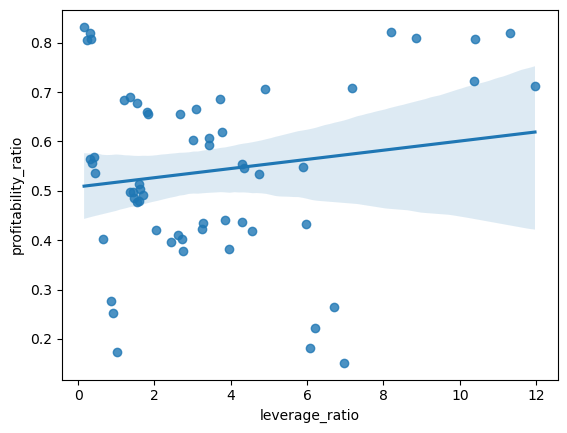

In [39]:
plot = sns.regplot(data=df, x='leverage_ratio', y='profitability_ratio')
plot

# Solution

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

# Read in the files
balance_sheet = pd.read_excel("data/Balance_Sheet.xlsx")
income_statement = pd.read_excel("data/Income_Statement.xlsx")

# Merge both the dataframes and call it df_ratios
df_ratios = pd.merge(income_statement, balance_sheet, on = ["Year", "company", "comp_type"])

# You only need to compute one profitability ratio, but since there is a choice, we are providing the code to compute both the gross margin ratio and the operating margin ratio 

# Compute gross margin ratio
df_ratios["profitability_ratio"] = (df_ratios["Total Revenue"] - df_ratios["Cost Of Goods Sold"])/df_ratios["Total Revenue"]

# Compute operating margin ratio, but commenting it out
# df_ratios["profitability_ratio"] = (df_ratios["Total Revenue"] - df_ratios["Total Operating Expenses"])/df_ratios["Total Revenue"]

# You only need to compute one leverage ratio, but we are providing the code to compute both the debt-to-equity ratio and the equity multiplier ratio 

# Compute debt-to-equity ratio
df_ratios["leverage_ratio"] = df_ratios["Total Liab"]/df_ratios["Total Stockholder Equity"]

# Compute equity multiplier ratio, but commenting it out
# df_ratios["leverage_ratio"] = df_ratios["Total Assets"]/df_ratios["Total Stockholder Equity"]

# Using pivot table to see the "comp_type" with the lowest average profitability ratio
print(df_ratios.pivot_table(index="comp_type", values="profitability_ratio"))
lowest_profitability = "fmcg"

# Using pivot table to see the "comp_type" with the highest average leverage ratio
print(df_ratios.pivot_table(index="comp_type", values="leverage_ratio"))
highest_leverage = "real_est"

# Plot the leverage ratio on x-axis and profitability on y axis to see if real estate companies with higher leverage ratio have  higher profitability
df_real_est = df_ratios.loc[df_ratios["comp_type"]=="real_est"]
plot = sns.regplot(data=df_real_est, x="leverage_ratio", y="profitability_ratio")
relationship = "positive"